In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Constructor Influence in recent 10 years

In [14]:
results = pd.read_csv('data/results.csv')
races = pd.read_csv('data/races.csv')
constructor = pd.read_csv('data/constructors.csv')

In [16]:
results['position'] = results['position'].replace('\\N',0)
results['position'] = results['position'].astype(int)

In [17]:
races_latest10 = races[races['year']>=2012]
races_latest10

,raceId,year,round,circuitId,name,date,time,url
858,860,2012,1,1,Australian Grand Prix,18/03/12,6:00:00,http://en.wikipedia.org/wiki/2012_Australian_G...
859,861,2012,2,2,Malaysian Grand Prix,25/03/12,8:00:00,http://en.wikipedia.org/wiki/2012_Malaysian_Gr...
860,862,2012,3,17,Chinese Grand Prix,15/04/12,7:00:00,http://en.wikipedia.org/wiki/2012_Chinese_Gran...
861,863,2012,4,3,Bahrain Grand Prix,22/04/12,12:00:00,http://en.wikipedia.org/wiki/2012_Bahrain_Gran...
862,864,2012,5,4,Spanish Grand Prix,13/05/12,12:00:00,http://en.wikipedia.org/wiki/2012_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,09/10/22,5:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...
1075,1093,2022,19,69,United States Grand Prix,23/10/22,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...
1076,1094,2022,20,32,Mexico City Grand Prix,30/10/22,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...
1077,1095,2022,21,18,Brazilian Grand Prix,13/11/22,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...


In [18]:
results_latest10 = results[results['raceId']>=860]
results_latest10_Winner = results_latest10[results_latest10['position']<=3]
results_latest10_Winner
results_latest10_Winner_withcon = results_latest10_Winner.merge(constructor,on='constructorId')

<AxesSubplot:title={'center':'Car Constructor Win Times During Last 10 Years'}>

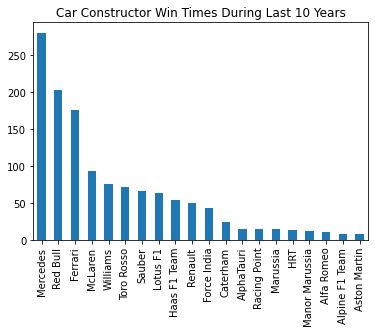

In [19]:
results_latest10_Winner_withcon['name'].value_counts().plot.bar(title = "Car Constructor Win Times During Last 10 Years")

In [20]:
df1 = results_latest10_Winner.merge(races, on = 'raceId')

In [21]:
df2 = df1[['constructorId','year']]
df3 = df2[df2['constructorId'] == 131]
df4 = df2[df2['constructorId'] == 9]
df5 = df2[df2['constructorId'] == 6]

<AxesSubplot:xlabel='year,constructorId'>

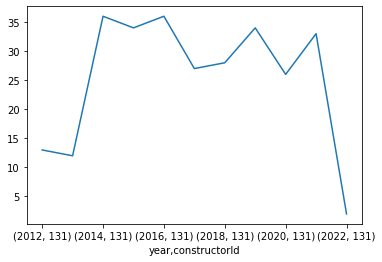

In [22]:
df3.groupby('year').value_counts().plot.line()

<AxesSubplot:xlabel='year,constructorId'>

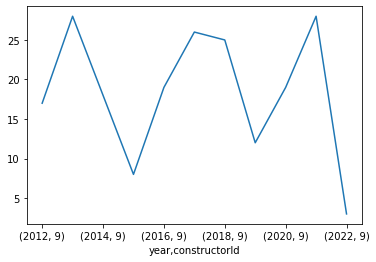

In [23]:
df4.groupby('year').value_counts().plot.line()

<AxesSubplot:xlabel='year,constructorId'>

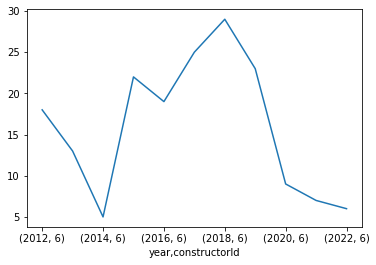

In [24]:
df5.groupby('year').value_counts().plot.line()

## Formula E Data

In [41]:
fe_results = pd.read_csv('data/formula_e_race_results.csv')
fe_results

,season,race_num,race_name,race_date,driver,car,team,team_group,rank,rank_num,grid,laps,time_retired,pts_rank,pts_pole,pts_bonus,points
0,2,2,2015 Putrajaya,2015-11-07,Lucas di Grassi,11,ABT Schaeffler Audi Sport,Audi,1,1,6,33,50:17.449,25,0,0,25
1,1,4,2015 Buenos Aires,2015-01-10,António Félix da Costa,55,Amlin Aguri,Techeetah,1,1,8,35,48:52.100,25,0,0,25
2,5,1,2018 Ad Diriyah,2018-12-15,António Félix da Costa,28,Andretti-BMW,BMW-Andretti,1,1,1,33,46:29.377,25,3,0,28
3,6,2,2019 Diriyah race 2,2019-11-23,Alexander Sims,27,Andretti-BMW,BMW-Andretti,1,1,1,30,46:48.327,25,3,0,28
4,6,3,2020 Santiago,2020-01-18,Maximilian Günther,28,Andretti-BMW,BMW-Andretti,1,1,2,40,46:11.511,25,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,6,8,2020 Berlin race 3,2020-08-08,Neel Jani,18,Porsche,Porsche,Ret,24,18,10,Collision,0,0,0,0
1476,7,2,2021 Diriyah race 2,2021-02-27,Edoardo Mortara,48,Venturi-Mercedes,Venturi,DNS,24,21,0,Did not start,0,0,0,0
1477,6,4,2020 Mexico City,2020-02-15,Robin Frijns,4,Virgin-Audi,Virgin,DSQ,24,6,36,Energy usage1,0,0,0,0
1478,6,9,2020 Berlin race 4,2020-08-09,Robin Frijns,4,Virgin-Audi,Virgin,DNS,24,10,0,Did not start,0,0,0,0


In [43]:
fe_results['rank'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', 'Ret', '15', 'NC', '16', '17', 'DSQ', '18', 'DNS',
       '19', 'DNP', '20', 'WD', 'EX', '21', '22', 'DSQ5', '23', 'DSQ4',
       'DSQ6'], dtype=object)

In [50]:
fe_winners = fe_results.iloc[0:213]
fe_winners

,season,race_num,race_name,race_date,driver,car,team,team_group,rank,rank_num,grid,laps,time_retired,pts_rank,pts_pole,pts_bonus,points
0,2,2,2015 Putrajaya,2015-11-07,Lucas di Grassi,11,ABT Schaeffler Audi Sport,Audi,1,1,6,33,50:17.449,25,0,0,25
1,1,4,2015 Buenos Aires,2015-01-10,António Félix da Costa,55,Amlin Aguri,Techeetah,1,1,8,35,48:52.100,25,0,0,25
2,5,1,2018 Ad Diriyah,2018-12-15,António Félix da Costa,28,Andretti-BMW,BMW-Andretti,1,1,1,33,46:29.377,25,3,0,28
3,6,2,2019 Diriyah race 2,2019-11-23,Alexander Sims,27,Andretti-BMW,BMW-Andretti,1,1,1,30,46:48.327,25,3,0,28
4,6,3,2020 Santiago,2020-01-18,Maximilian Günther,28,Andretti-BMW,BMW-Andretti,1,1,2,40,46:11.511,25,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,6,4,2020 Mexico City,2020-02-15,Sébastien Buemi,23,e.dams-Nissan,Nissan-Renault,3,3,4,36,+6.181,15,0,0,15
209,6,9,2020 Berlin race 4,2020-08-09,Sébastien Buemi,23,e.dams-Nissan,Nissan-Renault,3,3,4,37,+1.392,15,0,0,15
210,6,11,2020 Berlin race 6,2020-08-13,Sébastien Buemi,23,e.dams-Nissan,Nissan-Renault,3,3,2,36,+2.841,15,0,1,16
211,1,2,2014 Putrajaya,2014-11-22,Sébastien Buemi,9,e.dams-Renault,Nissan-Renault,3,3,19,31,+ 5.739,15,0,0,15


<AxesSubplot:title={'center':'F-E Car Constructor Win Times '}>

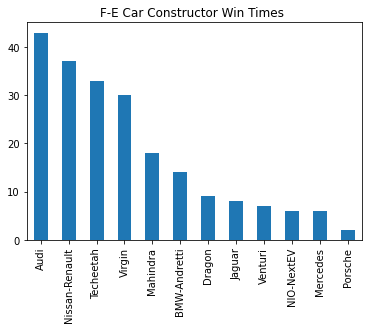

In [51]:
fe_winners['team_group'].value_counts().plot.bar(title = "F-E Car Constructor Win Times ")